<a href="https://colab.research.google.com/github/CesarAlejandroSoto/Arquitectura-de-Computadores/blob/main/Proyecto_1_Logica_booleana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**<h1 style="font-size: 160 px;">Integrantes</h1>**



*   CESAR ALEJANDRO SOTO PAIPA
*   JEISON FERNANDO GUARGUATI ANAYA
*   MARCOS JOSE ORJUELA MURILLO



**<h1 style="font-size: 160 px;">Objetivos</h1>**

Construir los siguientes chips, usando cualquier lenguaje de programacion.

* Nand (given)

* Not

* And

* Or

* Xor

* Mux

* DMux

* Not16

* And16

* Or16

* Mux16

* Or8Way

* Mux4Way16

* Mux8Way16

* DMux4Way

* DMux8Way

# Para este proyecto decidimos trabajar con python, tomando tambien como referencia los scripts de ejemplo dados en la documentacion de nand2tetris

In [ ]:
# Script General de la implementación de todas las compuertas partiendo desde la Nand

# Compuerta NAND: Realiza la operación lógica NAND sobre dos entradas.
# Retorna 1 si no es verdad (no a AND b), de lo contrario, retorna 0.
def NAND(a, b):
    return 1 if not (a and b) else 0

# Compuerta NOT: Invierte el valor de la entrada utilizando una NAND.
def NOT(a):
    return NAND(a, a)

# Compuerta AND: Realiza la operación lógica AND utilizando una NOT sobre la salida de una NAND.
def AND(a, b):
    return NOT(NAND(a, b))

# Compuerta OR: Realiza la operación lógica OR utilizando NOT y NAND.
def OR(a, b):
    return NAND(NOT(a), NOT(b))

# Compuerta XOR: Realiza la operación lógica XOR utilizando AND, NAND y OR.
def XOR(a, b):
    return AND(NAND(a, b), OR(a, b))

# Multiplexor (MUX): Selecciona entre dos entradas a y b basándose en la señal de selección (sel).
def MUX(a, b, sel):
    return OR(AND(a, NOT(sel)), AND(b, sel))

# Demultiplexor (DMUX): Distribuye una entrada (inp) en dos salidas dependiendo de la señal de selección (sel).
def DMUX(inp, sel):
    return (AND(inp, NOT(sel)), AND(inp, sel))

# Compuerta NOT16: Invierte cada bit de una lista de 16 bits.
def NOT16(a):
    return [NOT(bit) for bit in a]

# Compuerta AND16: Realiza la operación lógica AND entre cada par de bits de dos listas de 16 bits.
def AND16(a, b):
    return [AND(a[i], b[i]) for i in range(16)]

# Compuerta OR16: Realiza la operación lógica OR entre cada par de bits de dos listas de 16 bits.
def OR16(a, b):
    return [OR(a[i], b[i]) for i in range(16)]

# Multiplexor de 16 bits (MUX16): Selecciona entre las entradas a y b bit a bit, dependiendo de la señal de selección (sel).
def MUX16(a, b, sel):
    return [MUX(a[i], b[i], sel) for i in range(16)]

# Compuerta OR de 8 entradas (OR8Way): Realiza una operación OR entre un conjunto de 8 entradas.
def OR8Way(a):
    return OR(OR(OR(a[0], a[1]), OR(a[2], a[3])), OR(OR(a[4], a[5]), OR(a[6], a[7])))

# Multiplexor de 4 entradas de 16 bits (MUX4Way16): Selecciona entre cuatro entradas de 16 bits en función de las señales de selección (sel).
def MUX4Way16(a, b, c, d, sel):
    return MUX16(MUX16(a, b, sel[0]), MUX16(c, d, sel[0]), sel[1])

# Multiplexor de 8 entradas de 16 bits (MUX8Way16): Selecciona entre ocho entradas de 16 bits en función de las señales de selección (sel).
def MUX8Way16(a, b, c, d, e, f, g, h, sel):
    return MUX16(MUX4Way16(a, b, c, d, sel[:2]), MUX4Way16(e, f, g, h, sel[:2]), sel[2])

# Demultiplexor de 4 entradas (DMUX4Way): Distribuye una entrada de 16 bits en 4 salidas en función de las señales de selección (sel).
def DMUX4Way(inp, sel):
    a, b = DMUX(inp, sel[1])
    a0, a1 = DMUX(a, sel[0])
    b0, b1 = DMUX(b, sel[0])
    return a0, a1, b0, b1

# Demultiplexor de 8 entradas (DMUX8Way): Distribuye una entrada de 16 bits en 8 salidas en función de las señales de selección (sel).
def DMUX8Way(inp, sel):
    a, b = DMUX(inp, sel[2])
    return (*DMUX4Way(a, sel[:2]), *DMUX4Way(b, sel[:2]))


# PRUEBAS GENERALES

In [ ]:

# pruebas generales para cada compuerta
print(f"NOT--- {NOT(1)}")
print(f"NAND--- {NAND(1, 1)}")
print(f"AND--- {AND(1, 0)}")
print(f"OR--- {OR(1, 0)}")
print(f"XOR--- {XOR(1, 0)}")
print(f"MUX--- {MUX(0, 1, 0)}")
print(f"DMUX--- {DMUX(1, 0)}")
# Pruebas para las de 16 bits
a16 = [1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0]
b16 = [0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1]
c16 = [1]*16
d16 = [0]*16
e16 = [0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1]
f16 = [1,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0]
g16 = [1,0,1,1,0,1,0,0,1,0,1,1,0,1,0,0]
h16 = [0,1,0,0,1,0,1,1,0,1,0,0,1,0,1,1]
print(f"NOT16--- {NOT16(a16)}")
print(f"AND16--- {AND16(a16, b16)}")
print(f"OR16--- {OR16(a16, b16)}")
print(f"MUX16--- {MUX16(a16, b16, 0)}")
print(f"MUX16--- {MUX16(a16, b16, 1)}")
print(f"OR8Way--- {OR8Way([0,0,0,0,0,0,0,1])}")
print(f"MUX4Way16--- {MUX4Way16(a16, b16, c16, d16, [0,0])}")
print(f"MUX8Way16--- {MUX8Way16(a16, b16, c16, d16, e16, f16, g16, h16, [1,1,0])}")
print(f"DMUX4Way--- {DMUX4Way(1, [0,1])}")
print(f"DMUX8Way--- {DMUX8Way(1, [1,0,1])}")


NOT--- 0
NAND--- 0
AND--- 0
OR--- 1
XOR--- 1
MUX--- 0
DMUX--- (1, 0)
NOT16--- [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
AND16--- [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
OR16--- [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
MUX16--- [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0]
MUX16--- [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
OR8Way--- 1
MUX4Way16--- [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0]
MUX8Way16--- [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
DMUX4Way--- (0, 0, 1, 0)
DMUX8Way--- (0, 0, 0, 0, 0, 1, 0, 0)


# EXPLICACION DE ALGUNAS COMPUERTAS
# OR8WAY


In [ ]:
def OR8Way(a):
    return OR(OR(OR(a[0], a[1]), OR(a[2], a[3])), OR(OR(a[4], a[5]), OR(a[6], a[7])))

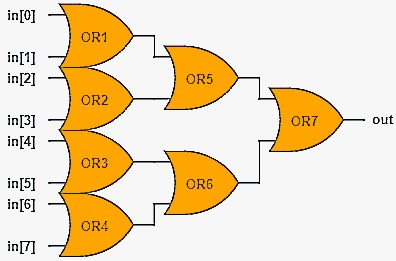

In [ ]:
# Pruebas
casos = [
    [0, 0, 0, 0, 0, 0, 0, 0],  # Debe retornar 0
    [1, 1, 1, 1, 1, 1, 1, 1],  # Debe retornar 1
    [0, 0, 0, 1, 0, 0, 0, 0],  # Debe retornar 1
    [0, 0, 0, 0, 0, 0, 0, 1],  # Debe retornar 1
    [0, 0, 1, 0, 0, 1, 1, 0]   # Debe retornar 1
]

# Ejecutar pruebas e imprimir resultados
for entrada in casos:
    salida = OR8Way(entrada)
    print(f"Entrada: {entrada} -> Salida: {salida}")

Entrada: [0, 0, 0, 0, 0, 0, 0, 0] -> Salida: 0
Entrada: [1, 1, 1, 1, 1, 1, 1, 1] -> Salida: 1
Entrada: [0, 0, 0, 1, 0, 0, 0, 0] -> Salida: 1
Entrada: [0, 0, 0, 0, 0, 0, 0, 1] -> Salida: 1
Entrada: [0, 0, 1, 0, 0, 1, 1, 0] -> Salida: 1


# MUX4WAY16

In [ ]:
def MUX4Way16(a, b, c, d, sel):
    return MUX16(MUX16(a, b, sel[0]), MUX16(c, d, sel[0]), sel[1])


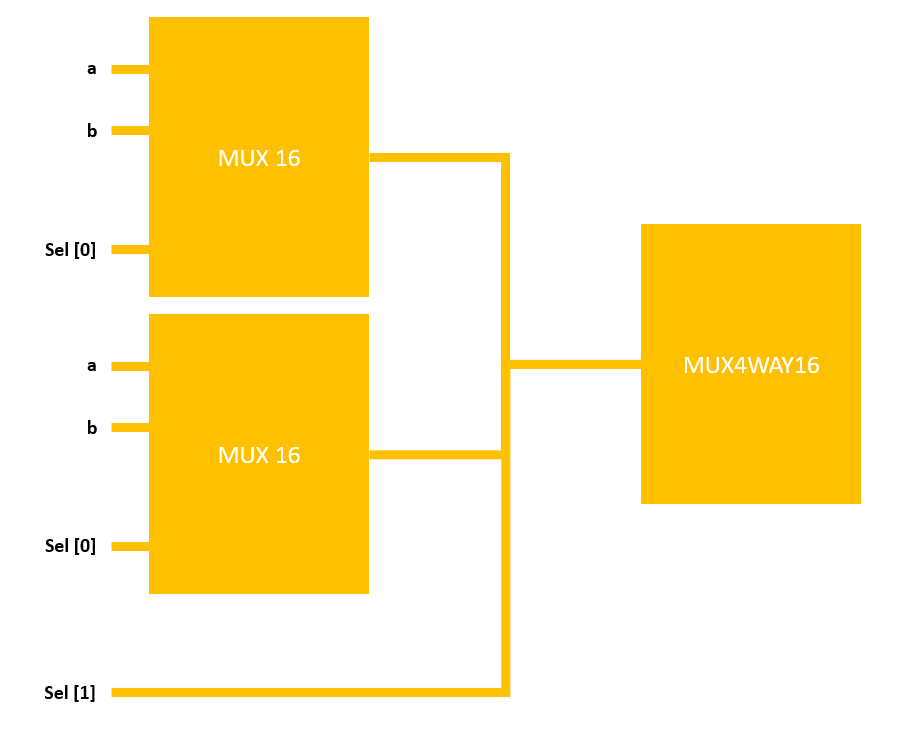

In [ ]:
# Casos de prueba para MUX4Way16
casos = [
    ([0]*16, [0]*16, [0]*16, [0]*16, [0, 0]),  # Debe retornar 0000000000000000
    ([0]*16, [0]*16, [0]*16, [0]*16, [0, 1]),  # Debe retornar 0000000000000000
    ([0]*16, [0]*16, [0]*16, [0]*16, [1, 0]),  # Debe retornar 0000000000000000
    ([0]*16, [0]*16, [0]*16, [0]*16, [1, 1]),  # Debe retornar 0000000000000000
    ([0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0],  # 0001001000110100
     [1,0,0,1,1,0,0,0,0,1,1,1,0,1,1,0],  # 1001100001110110
     [1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0],  # 1010101010101010
     [0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1],  # 0101010101010101
     [0, 0]),  # Debe retornar 0001001000110100
    ([0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0],
     [1,0,0,1,1,0,0,0,0,1,1,1,0,1,1,0],
     [1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0],
     [0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1],
     [0, 1]),  # Debe retornar 1001100001110110
    ([0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0],
     [1,0,0,1,1,0,0,0,0,1,1,1,0,1,1,0],
     [1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0],
     [0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1],
     [1, 0]),  # Debe retornar 1010101010101010
    ([0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0],
     [1,0,0,1,1,0,0,0,0,1,1,1,0,1,1,0],
     [1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0],
     [0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1],
     [1, 1])   # Debe retornar 0101010101010101
]

# Ejecutar pruebas e imprimir resultados
for a, b, c, d, sel in casos:
    salida = MUX4Way16(a, b, c, d, sel)
    print(f"Sel: {sel} -> Salida: {''.join(map(str, salida))}")

Sel: [0, 0] -> Salida: 0000000000000000
Sel: [0, 1] -> Salida: 0000000000000000
Sel: [1, 0] -> Salida: 0000000000000000
Sel: [1, 1] -> Salida: 0000000000000000
Sel: [0, 0] -> Salida: 0001001000110100
Sel: [0, 1] -> Salida: 1010101010101010
Sel: [1, 0] -> Salida: 1001100001110110
Sel: [1, 1] -> Salida: 0101010101010101


# MUX8WAY16

In [ ]:
def MUX8Way16(a, b, c, d, e, f, g, h, sel):
    return MUX16(MUX4Way16(a, b, c, d, sel[:2]), MUX4Way16(e, f, g, h, sel[:2]), sel[2])

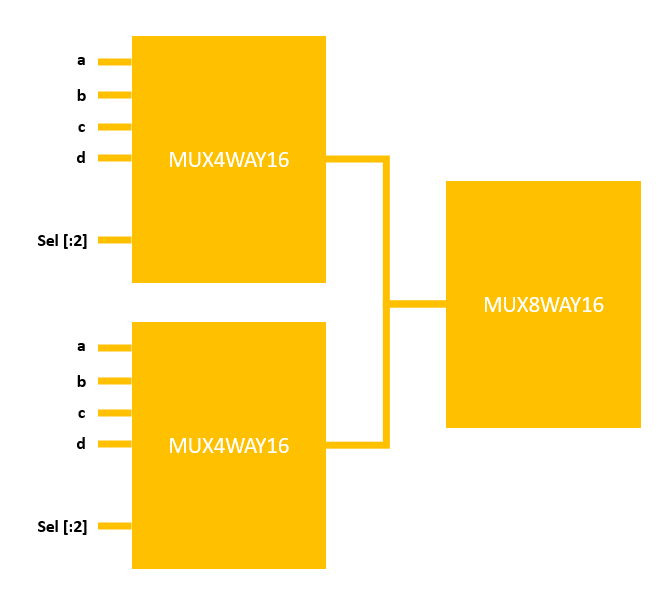

In [ ]:

# Casos de prueba para la Mux8way16
casos = [
    ([0]*16, [0]*16, [0]*16, [0]*16, [0]*16, [0]*16, [0]*16, [0]*16, [0, 0, 0]),  # 000 -> Debe retornar 0000000000000000
    ([0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0],  # 0001001000110100
     [0,1,0,0,0,1,0,1,1,0,1,1,1,0,0,1],  # 0010001101000101
     [0,0,1,1,0,1,0,0,1,0,1,0,1,1,0,0],  # 0011010001010110
     [0,1,0,0,0,1,1,0,1,0,1,1,0,0,1,1],  # 0100010101100111
     [0,1,0,1,0,1,1,0,0,1,1,1,1,0,0,0],  # 0101011001111000
     [0,1,1,0,0,1,1,1,1,0,0,1,0,0,1,1],  # 0110011110001001
     [0,1,1,1,1,0,0,0,1,0,0,1,1,0,1,0],  # 0111100010011010
     [1,0,0,0,1,0,0,1,1,0,1,0,1,0,1,1],  # 1000100110101011
     [0, 1, 1])  #  Debe retornar 0111100010011010
]

# Ejecutar pruebas
for a, b, c, d, e, f, g, h, sel in casos:
    salida = MUX8Way16(a, b, c, d, e, f, g, h, sel)
    print(f"Sel: {''.join(map(str, sel))} -> Salida: {''.join(map(str, salida))}")


Sel: 000 -> Salida: 0000000000000000
Sel: 011 -> Salida: 0111100010011010


# DMUX4WAY

In [ ]:
def DMUX4Way(inp, sel):
    a, b = DMUX(inp, sel[1])
    a0, a1 = DMUX(a, sel[0])
    b0, b1 = DMUX(b, sel[0])
    return a0, a1, b0, b1

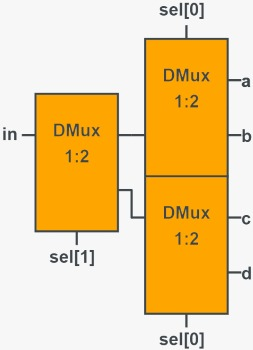

In [ ]:

# Casos de prueba
casos = [
    (0, [0, 0]),  # Entrada 0, selector [00] -> (0, 0, 0, 0)
    (0, [0, 1]),  # Entrada 0, selector [01] -> (0, 0, 0, 0)
    (0, [1, 0]),  # Entrada 0, selector [10] -> (0, 0, 0, 0)
    (0, [1, 1]),  # Entrada 0, selector [11] -> (0, 0, 0, 0)
    (1, [0, 0]),  # Entrada 1, selector [00] -> (1, 0, 0, 0)
    (1, [0, 1]),  # Entrada 1, selector [01] -> (0, 1, 0, 0)
    (1, [1, 0]),  # Entrada 1, selector [10] -> (0, 0, 1, 0)
    (1, [1, 1]),  # Entrada 1, selector [11] -> (0, 0, 0, 1)
]

# Ejecutar pruebas
for inp, sel in casos:
    salida = DMUX4Way(inp, sel)
    print(f"In: {inp} | Sel: {''.join(map(str, sel))} -> a: {salida[0]}, b: {salida[1]}, c: {salida[2]}, d: {salida[3]}")


In: 0 | Sel: 00 -> a: 0, b: 0, c: 0, d: 0
In: 0 | Sel: 01 -> a: 0, b: 0, c: 0, d: 0
In: 0 | Sel: 10 -> a: 0, b: 0, c: 0, d: 0
In: 0 | Sel: 11 -> a: 0, b: 0, c: 0, d: 0
In: 1 | Sel: 00 -> a: 1, b: 0, c: 0, d: 0
In: 1 | Sel: 01 -> a: 0, b: 0, c: 1, d: 0
In: 1 | Sel: 10 -> a: 0, b: 1, c: 0, d: 0
In: 1 | Sel: 11 -> a: 0, b: 0, c: 0, d: 1


# DMUX8WAY

In [ ]:
def DMUX8Way(inp, sel):
    a, b = DMUX(inp, sel[2])
    return (*DMUX4Way(a, sel[:2]), *DMUX4Way(b, sel[:2]))

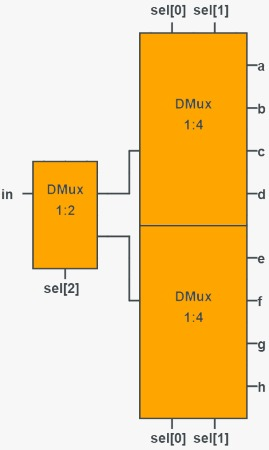

In [ ]:


# Casos de prueba
casos = [
    (0, [0, 0, 0]),  # Entrada 0, selector [000] -> (0, 0, 0, 0, 0, 0, 0, 0)
    (0, [0, 0, 1]),  # Entrada 0, selector [001] -> (0, 0, 0, 0, 0, 0, 0, 0)
    (0, [0, 1, 0]),  # Entrada 0, selector [010] -> (0, 0, 0, 0, 0, 0, 0, 0)
    (0, [0, 1, 1]),  # Entrada 0, selector [011] -> (0, 0, 0, 0, 0, 0, 0, 0)
    (0, [1, 0, 0]),  # Entrada 0, selector [100] -> (0, 0, 0, 0, 0, 0, 0, 0)
    (0, [1, 0, 1]),  # Entrada 0, selector [101] -> (0, 0, 0, 0, 0, 0, 0, 0)
    (0, [1, 1, 0]),  # Entrada 0, selector [110] -> (0, 0, 0, 0, 0, 0, 0, 0)
    (0, [1, 1, 1]),  # Entrada 0, selector [111] -> (0, 0, 0, 0, 0, 0, 0, 0)
    (1, [0, 0, 0]),  # Entrada 1, selector [000] -> (1, 0, 0, 0, 0, 0, 0, 0)
    (1, [0, 0, 1]),  # Entrada 1, selector [001] -> (0, 1, 0, 0, 0, 0, 0, 0)
    (1, [0, 1, 0]),  # Entrada 1, selector [010] -> (0, 0, 1, 0, 0, 0, 0, 0)
    (1, [0, 1, 1]),  # Entrada 1, selector [011] -> (0, 0, 0, 1, 0, 0, 0, 0)
    (1, [1, 0, 0]),  # Entrada 1, selector [100] -> (0, 0, 0, 0, 1, 0, 0, 0)
    (1, [1, 0, 1]),  # Entrada 1, selector [101] -> (0, 0, 0, 0, 0, 1, 0, 0)
    (1, [1, 1, 0]),  # Entrada 1, selector [110] -> (0, 0, 0, 0, 0, 0, 1, 0)
    (1, [1, 1, 1]),  # Entrada 1, selector [111] -> (0, 0, 0, 0, 0, 0, 0, 1)
]

# Ejecutar pruebas
for inp, sel in casos:
    salida = DMUX8Way(inp, sel)
    print(f"In: {inp} | Sel: {''.join(map(str, sel))} -> a: {salida[0]}, b: {salida[1]}, c: {salida[2]}, d: {salida[3]}, e: {salida[4]}, f: {salida[5]}, g: {salida[6]}, h: {salida[7]}")


In: 0 | Sel: 000 -> a: 0, b: 0, c: 0, d: 0, e: 0, f: 0, g: 0, h: 0
In: 0 | Sel: 001 -> a: 0, b: 0, c: 0, d: 0, e: 0, f: 0, g: 0, h: 0
In: 0 | Sel: 010 -> a: 0, b: 0, c: 0, d: 0, e: 0, f: 0, g: 0, h: 0
In: 0 | Sel: 011 -> a: 0, b: 0, c: 0, d: 0, e: 0, f: 0, g: 0, h: 0
In: 0 | Sel: 100 -> a: 0, b: 0, c: 0, d: 0, e: 0, f: 0, g: 0, h: 0
In: 0 | Sel: 101 -> a: 0, b: 0, c: 0, d: 0, e: 0, f: 0, g: 0, h: 0
In: 0 | Sel: 110 -> a: 0, b: 0, c: 0, d: 0, e: 0, f: 0, g: 0, h: 0
In: 0 | Sel: 111 -> a: 0, b: 0, c: 0, d: 0, e: 0, f: 0, g: 0, h: 0
In: 1 | Sel: 000 -> a: 1, b: 0, c: 0, d: 0, e: 0, f: 0, g: 0, h: 0
In: 1 | Sel: 001 -> a: 0, b: 0, c: 0, d: 0, e: 1, f: 0, g: 0, h: 0
In: 1 | Sel: 010 -> a: 0, b: 0, c: 1, d: 0, e: 0, f: 0, g: 0, h: 0
In: 1 | Sel: 011 -> a: 0, b: 0, c: 0, d: 0, e: 0, f: 0, g: 1, h: 0
In: 1 | Sel: 100 -> a: 0, b: 1, c: 0, d: 0, e: 0, f: 0, g: 0, h: 0
In: 1 | Sel: 101 -> a: 0, b: 0, c: 0, d: 0, e: 0, f: 1, g: 0, h: 0
In: 1 | Sel: 110 -> a: 0, b: 0, c: 0, d: 1, e: 0, f: 0, g: 0, 